In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
dataFrame = pd.read_csv("train_titanic.csv")

In [26]:
dataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
dataFrame[dataFrame.columns[dataFrame.isnull().any()]].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [28]:
survivedPassengers = dataFrame.loc[dataFrame['Survived'] == 1]
survivedPassengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [29]:
ticketClasses = np.unique(dataFrame['Pclass'].values)
ticketClasses

array([1, 2, 3], dtype=int64)

# Задание 1

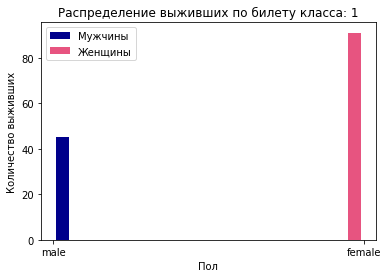

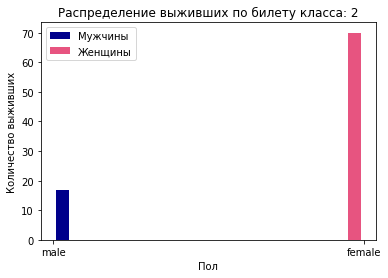

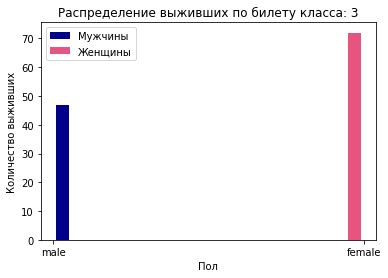

In [72]:
for ticketClass in ticketClasses:
    survivedPassengersByTicketClass = survivedPassengers.loc[survivedPassengers['Pclass'] == ticketClass]
    males = survivedPassengersByTicketClass.loc[survivedPassengersByTicketClass['Sex'] == 'male'].Sex
    females = survivedPassengersByTicketClass.loc[survivedPassengersByTicketClass['Sex'] == 'female'].Sex
    plt.hist([males, females], color=[
         '#00008b', '#e75480'], label=['Мужчины', 'Женщины'])
    plt.xlabel('Пол')
    plt.ylabel('Количество выживших')
    plt.legend()
    plt.title('Распределение выживших по билету класса: {0}'.format(ticketClass))
    plt.show()

# Задание 2

Text(0.5, 1.0, 'Круговая диаграмма класса билета')

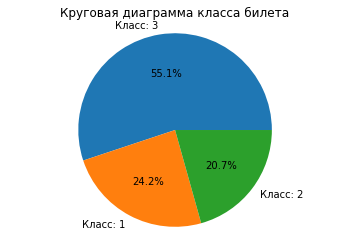

In [73]:
ticketClassCount = dataFrame.Pclass.value_counts()
ticketClassLabels = ['Класс: {0}'.format(x) for x in ticketClassCount.index]
plt.pie(ticketClassCount, labels=ticketClassLabels, autopct='%1.1f%%')
plt.axis("equal")
plt.title('Круговая диаграмма класса билета')

# Задание 3

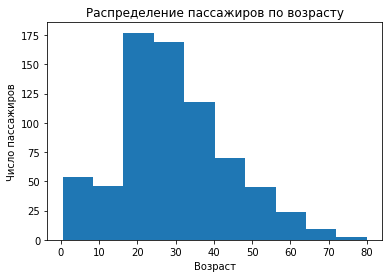

In [79]:
ages = dataFrame.Age
plt.hist(ages)
plt.xlabel('Возраст')
plt.ylabel('Число пассажиров')
plt.title('Распределение пассажиров по возрасту')
plt.show()